# Evaluate your evaluation methods! A key to meaningful inference.

In [1]:
# Load modules
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
import plotly.graph_objects as go

<div class="alert alert-block alert-info">

*Setting*:

- We know you're a neuroscientist, so you're used to making sense of complicated data.
- We'll consider here some non-neural data.
- We'll apply a standard analysis approach, to produce nonsense.
- We'll then explore powerful yet simple tools to diagnose and untangle this nonsense & produce a meaningful result.

</div>

## 1. The data: swim lessons versus drownings.

You receive data from a federal organization interested in understanding the impact of swimming lessons on swim safety. The data consist of the following information from in `N = 299` communities:

* `swim_lessons` - the number of swim lessons in a community,

* `drownings`   - the number of drownings (per 100,000 individuals) in a community,

* `xy` - the geographic location (latitude and longitude) of the community,

In [2]:
# Load the data.

data         = sio.loadmat('swim_lesson_data.mat')       # Load the data
swim_lessons = data['swim_lessons']                      # ... and define the variables.
drownings    = data['drownings']
xy           = data['xy']

We're interested in understanding the relationship (if any) between `swim_lessons` and `drownings`.

Let's start by plotting the data.

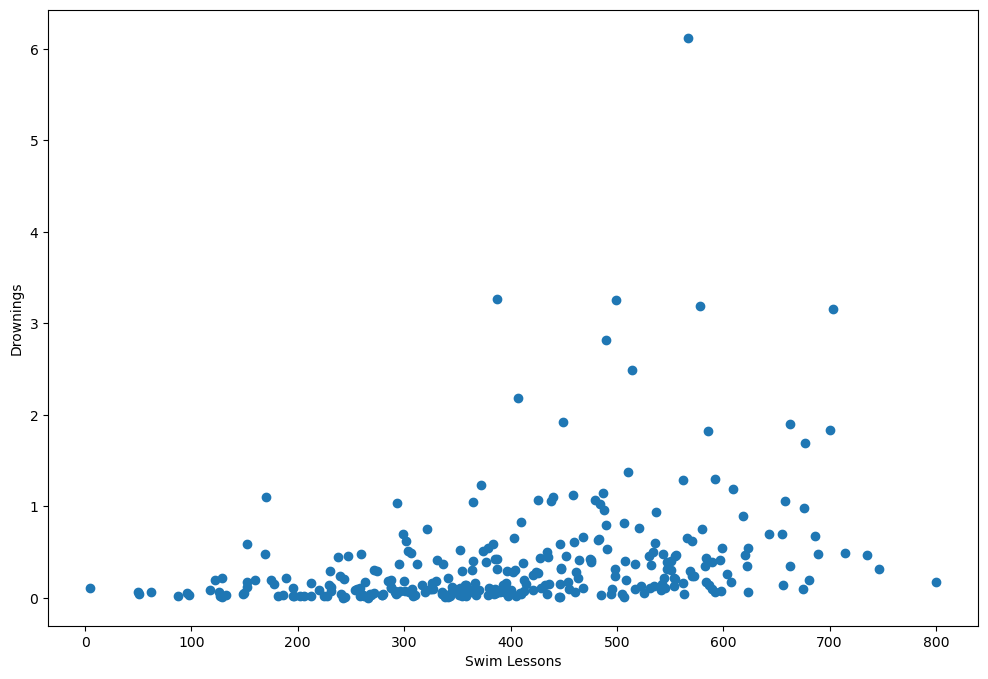

In [3]:
# Plot the data.

plt.figure(figsize=(12, 8))
plt.scatter(swim_lessons, drownings)
plt.xlabel('Swim Lessons')
plt.ylabel('Drownings');

<div class="alert alert-block alert-success">

**Q:** What do you observe?

**A:**

</div>

---
Let's also plot the geographic location of each community.

In [ ]:
# Example x-y coordinates
x_coordinates = xy[:,1]
y_coordinates = xy[:,0]
# Create a scattermapbox trace
trace = go.Scattermapbox(
    lat=y_coordinates,
    lon=x_coordinates,
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        opacity=0.5
    ),
)

# Define the layout for the map
layout = go.Layout(
    mapbox=dict(
        center=dict(lat=sum(y_coordinates)/len(y_coordinates), lon=sum(x_coordinates)/len(x_coordinates)),
        zoom=9,
        style='open-street-map'  # You can change the map style
    ),
    title='Communities in Study'
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout);
fig.update_layout(width=800, height=600);

# Show the plot
fig.show();

<div class="alert alert-block alert-success">

**Q:** What do you observe?

**A:**
    
</div>

---
---

## 2. Make an inference: how do more swim lessons relate to drownings?

Now, let's make an **inference** (i.e., draw a scientific conclusion) from these data. In general, our goal is to infer from the noisy data a meaningful feature that's simpler than the data itself.

There are many ways to do so.

Here, we'd like to understand if there's a relationship between `swim_lessons` and `drownings`.

To do so, let's **fit a line** to the data. The slope of the line (a single number) provides an estimate of the relationship between the number of `drowings` and `swim_lessons`.

In [5]:
# Estimate a line from the data using regression.

from statsmodels.formula.api import ols

dat                = {"x": swim_lessons, "y": drownings}
regression_results = ols("y ~ 1 + x", data=dat).fit()

<div class="alert alert-block alert-success">

**Q:** Can you see the equation for the line in the code above?

**A:**
    
</div>

---
Now, with the line estimated, let's print the estimated slope and its p-value.

In [6]:
print('Slope estimate =',regression_results.params[1])
print('p-value        =',regression_results.pvalues[1])

Slope estimate = 0.0013774419076467484
p-value        = 4.190476729564408e-09


<div class="alert alert-block alert-success">

**Q:** Interpert the results ... what does this mean?

**A:** We find a highly significant (p<<0.05) positive, relationship between swim lessons and drownings. 
</div>

---
Let's also **visualize** the estimated line by plotting it with the data.

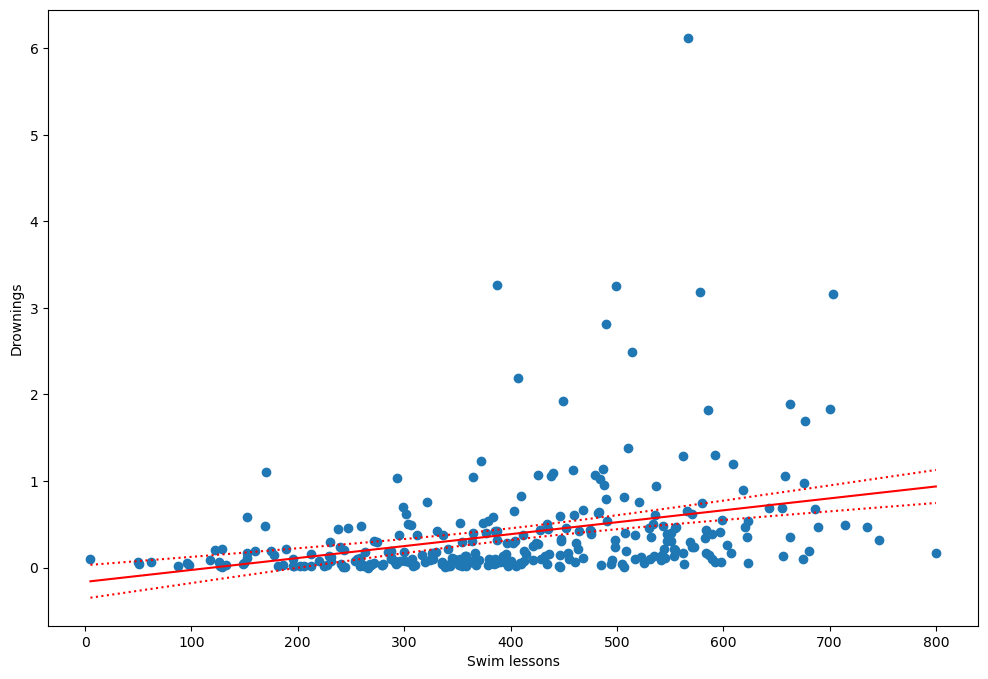

In [7]:
# Get model prediction.
pred   = regression_results.get_prediction().summary_frame()
mn     = pred['mean']
ci_low = pred['mean_ci_lower'] 
ci_upp = pred['mean_ci_upper']

# And plot it.
indices_sorted = np.argsort(swim_lessons,0)
plt.figure(figsize=(12, 8))
plt.scatter(swim_lessons,drownings)
plt.plot(swim_lessons[indices_sorted[:,0]],mn[indices_sorted[:,0]], 'r')
plt.plot(swim_lessons[indices_sorted[:,0]],ci_low[indices_sorted[:,0]], ':r')
plt.plot(swim_lessons[indices_sorted[:,0]],ci_upp[indices_sorted[:,0]], ':r')
plt.xlabel('Swim lessons')
plt.ylabel('Drownings');

<div class="alert alert-block alert-success">

**Q:** Again, interpert the results of your estimation ... what does this mean?

**A:** Nothing looks terribly wrong ... there's a line with a confidence interval that seems to fit the data.

</div>

<div class="alert alert-block alert-danger">
So, now we're done.

</p>

We've applied a standard analysis approach and found a (highly) significant result, certainly a result passable for peer-reviewed publication.


Our next step is to report our results and publish with confidence ... right? ... right?
</div>

<div class="alert alert-block alert-info">

*Moment of tension*:

- Hook the learner - "something isn't right and I want to know why."

</div>

---
---

## 3. Something’s not right … evaluate your evaluation method.

To look for a relationship between `swim_lessons` and `drownings`, we chose a particular model of the relationship - we fit a line to the data. But, was this a good choice?

An important step in any analysis is to **check our model**.

To do so, let's look at the difference between the estimated drownings from the line and the actual values for `drownings`, i.e., let's look at the **residuals**.

If the model is a good fit to the data, then we expect a patternless set of residuals (i.e., the residuals are "just noise" around our good model fit to the data).

Alternatively, if we find patterns in the residuals, we might wonder about our model choice, and consider strategies to improve our model.

To start let's plot the model errors (i.e., the residuals)...

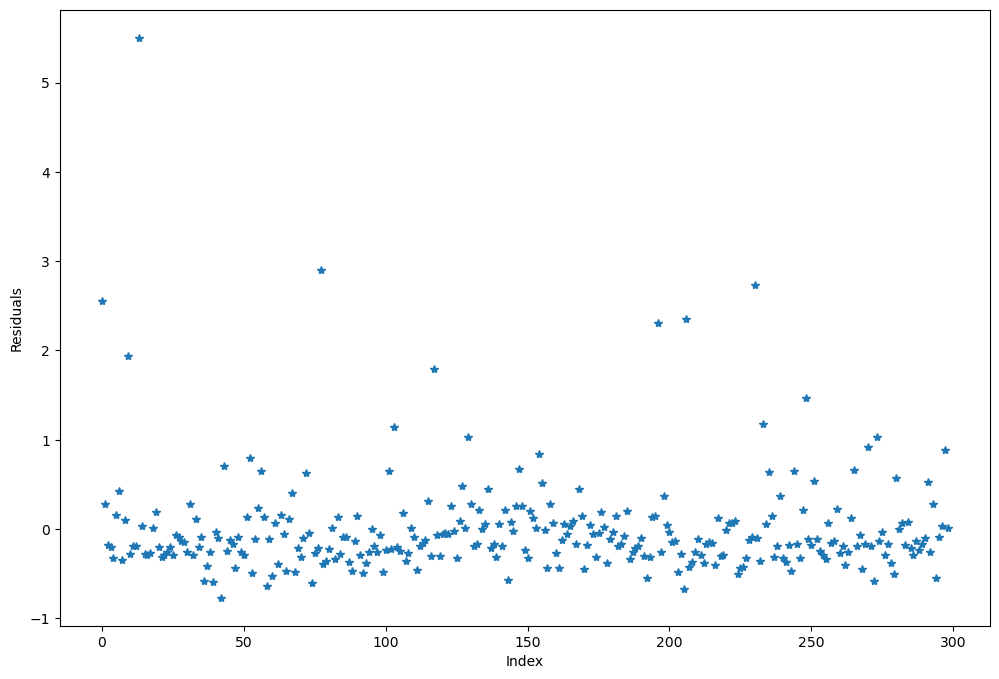

In [8]:
residuals = regression_results.resid
plt.figure(figsize=(12, 8))
plt.plot(residuals, '*')
plt.xlabel('Index')
plt.ylabel('Residuals');

<div class="alert alert-block alert-success">

**Q:** What do you see in the residuals ... do you see any patterns?

**A:**

</div>

<div class="alert alert-block alert-danger">

In the plot above, no systematic patterns are obvious; instead, the residuals appear to fluctuate around 0.

That means our model is all good, right?
</div>

---

However, this visualization of the residuals is *not* very informative; the horizontal axis (the variable `index`) is arbitrary.

To observe systematic patterns in the residuals, let's plot the `residuals` versus the predictor in our model: the number of `swim_lessons`.

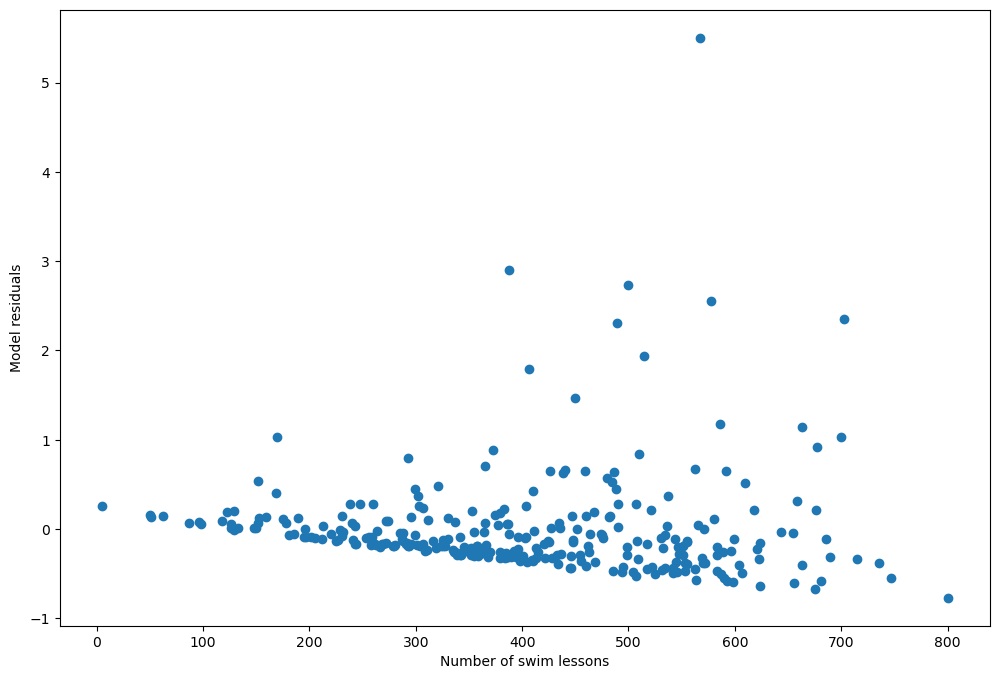

In [9]:
plt.figure(figsize=(12, 8))
plt.scatter(swim_lessons, residuals)
plt.xlabel('Number of swim lessons')
plt.ylabel('Model residuals');

<div class="alert alert-block alert-success">

**Q:** Now, do the residuals look patternless? What patterns do you see?

**A:**

</div>

Our inspection of `residuals` versus `swim_lessons` reveals two clear patterns:

- as `swim_lessons` increases, a systematic decrease in the `residuals`,
- as `swim_lessons` increases, the variability of the `residuals` tends to increase.

We conclude from this **model check** that something isn't right ... our model doesn't adequately describe features in the data.

<div class="alert alert-block alert-success">

**Q:** We've plotted the `residuals` versus the predictor `swim_lessons`, but we could also plot
    `residuals` versus the outcome variable `drownings`. Doing so, what do you see?

**A:**

</div>

---
So far, we've investigated how the `residuals` vary with the predictor `swim_lessons` or outcome `drownings`.

But, we have more information: we also have the geographic location (latitude and longitude) of each community in the study.

Let's investigate how the `residuals` relate to the geographic location of the community.

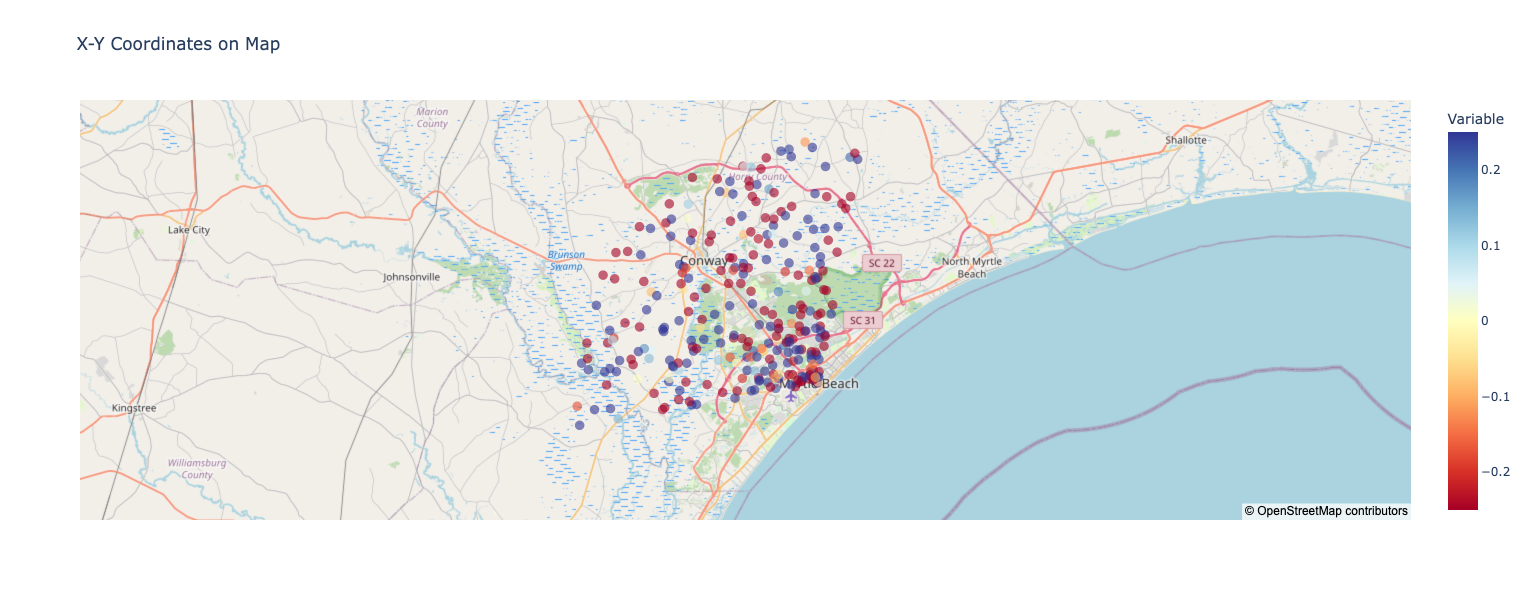

In [23]:
import plotly.graph_objects as go

# Example x-y coordinates
x_coordinates = xy[:,1]
y_coordinates = xy[:,0]
# Create a scattermapbox trace
trace = go.Scattermapbox(
    lat=y_coordinates,
    lon=x_coordinates,
    mode='markers',
    marker=dict(
        size=10,
        color=residuals.to_numpy(),
        colorscale='RdYlBu',  # Choose a colorscale (Red-Blue in this case)
        cmin=-0.25, #min(residuals.to_numpy()),
        cmax= 0.25, #max(residuals.to_numpy()),
        colorbar=dict(title='Variable'),
        opacity=0.6
    ),
)

# Define the layout for the map
layout = go.Layout(
    mapbox=dict(
        center=dict(lat=sum(y_coordinates)/len(y_coordinates), lon=sum(x_coordinates)/len(x_coordinates)),
        zoom=9,
        style='open-street-map'  # You can change the map style
    ),
    title='X-Y Coordinates on Map'
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(width=800, height=600)

# Show the plot
fig.show()

<div class="alert alert-block alert-success">

**Q:** Do the residuals look patternless? Do you see any patterns in the residuals that depend on location?

**A:**
    
</div>

<div class="alert alert-block alert-info">

*Moment of semi-relief*: Learner's intuition matched by model check (the model is bad).

*Moment of semi-despair*: Now what?
</div>

---
---
## 4. Improve your scientific conclusions by improving your inference strategy.

<div class="alert alert-block alert-danger">
Our results so far are not encouraging.

</p>

We're finding a significant, positive relationship between `swim_lessons` and `drownings`

(i.e., with *more* swim lessons there are *more* drownings).

How can this be?
</div>

By performing our **model check**, we found patterns in the model errors (i.e., in the `residuals`).

In particular, we noticed a spatial pattern in the residuals:
- positive residuals near the coast,
- negative resiudals away from the coast.

This pattern in the residuals suggests our model is missing an important factor.

<div class="alert alert-block alert-success">

**Q:** What is missing from the model?

**A:**

</div>

---

The pattern in the residuls suggests we model `drownings` with two predictors

1. The number of swim lessons (`swim_lessons`), and
2. The distance from the ocean (`distance_from_ocean`).

To do so, let's fit a "2-dimensional line" (i.e., a plane) to the data.

In [11]:
# Load the additional variable,

distance_from_ocean = data['distance_from_ocean']

# And, fit the 2-dimensional line

dat = {"w": distance_from_ocean, "x": swim_lessons, "y": drownings}
regression_results_2_predictor = ols("y ~1 + w + x", data=dat).fit()

<div class="alert alert-block alert-success">

**Q:** Can you see the equation for the 2-dimensional line in the code above?

**A:**

</div>

---
Now, with the 2-dimensional line estimated, let's print the estimated slope and p-value for each predictor.

In [12]:
print('Distance from ocean')
print('Slope estimate =',regression_results_2_predictor.params[1])
print('p-value        =',regression_results_2_predictor.pvalues[1])

print('\nNumber of swim lessons')
print('Slope estimate =',regression_results_2_predictor.params[2])
print('p-value        =',regression_results_2_predictor.pvalues[2])

Distance from ocean
Slope estimate = -0.060241760028910865
p-value        = 2.6700213129223156e-11

Number of swim lessons
Slope estimate = -0.00032748185532345027
p-value        = 0.3135181625105993


<div class="alert alert-block alert-success">

**Q:** Interpert the results ... what does this mean?

**A:**

</div>

---
Let's visualize our model, which is now the 2-dimensional plane:


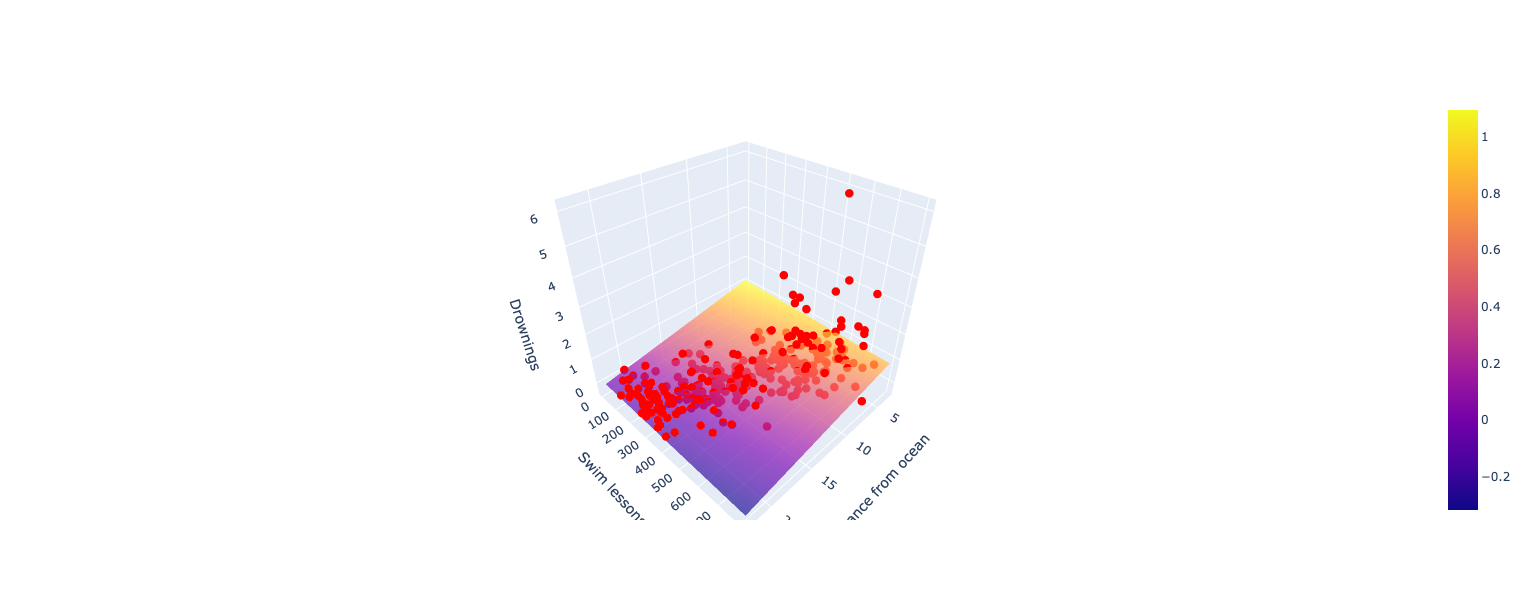

In [13]:
# Create a meshgrid for 3D plotting
x1 = np.transpose(distance_from_ocean)[0];
x2 = np.transpose(swim_lessons)[0];
y  = np.transpose(drownings)[0]; 
x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Predict the response for each point in the meshgrid
coefficients = regression_results_2_predictor.params
y_pred_mesh = coefficients[0] + coefficients[1] * x1_mesh + coefficients[2] * x2_mesh

# Create an interactive 3D plot using plotly
fig = go.Figure()

# Scatter plot for data points
fig.add_trace(go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    mode='markers',
    marker=dict(size=5, color='red') #,
#    name='Data Points'
))

# Surface plot for OLS regression surface
fig.add_trace(go.Surface(
    x=x1_mesh,
    y=x2_mesh,
    z=y_pred_mesh,
    #colorscale='blues',
    opacity=0.7,
    name='OLS Surface'
))

# Set layout
fig.update_layout(
    scene=dict(
        xaxis_title='Distance from ocean',
        yaxis_title='Swim lessons',
        zaxis_title='Drownings',
    )
)

fig.update_layout(width=800, height=600)

# Show the interactive plot
fig.show()

# Show the plot
plt.show()

---
Let's **model check** the new model.

To do so, let's plot the new model errors (i.e., the `residuals`) versus a predictor in our model (here, the number of `swim_lessons`).

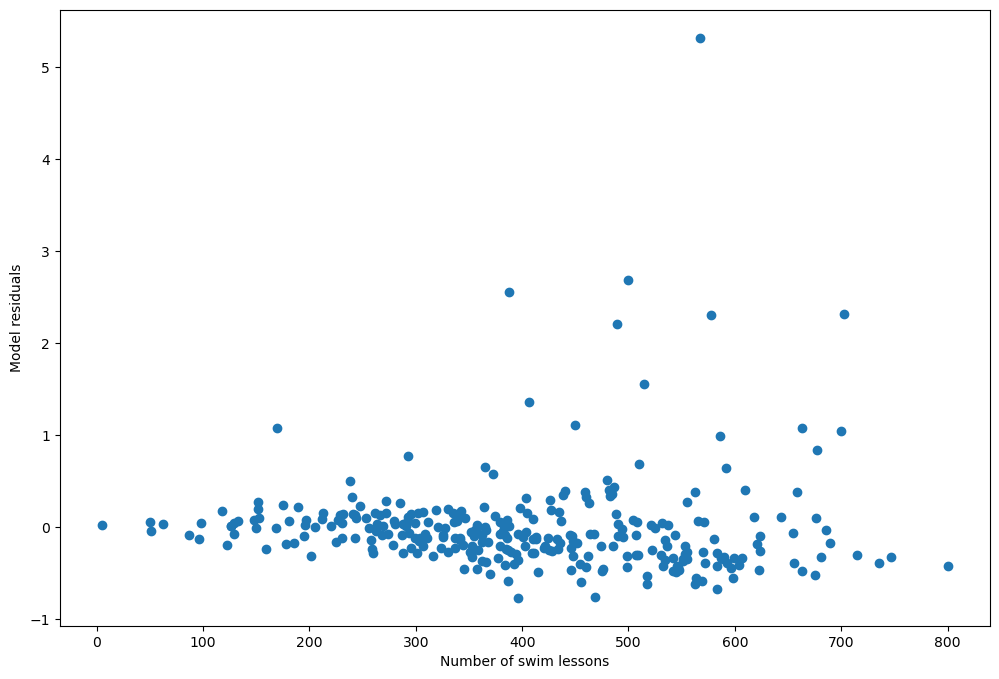

In [14]:
residuals_2_predictor = regression_results_2_predictor.resid
plt.figure(figsize=(12, 8))
plt.scatter(swim_lessons, residuals_2_predictor)
plt.xlabel('Number of swim lessons')
plt.ylabel('Model residuals');

<div class="alert alert-block alert-success">

**Q:** Do the residuals look less patterned (compared to our original line fit)? Do you still see any patterns?

**A:**
    
</div>

In this new model, our inspection of `residuals` versus `swim_lessons` reveals

- as `swim_lessons` increases, *no* systematic trend in the `residuals`,
- as `swim_lessons` increases, the variability of the `residuals` tends to increase.

This is a nice improvement compared to our original model. Including the additional variable has reduced a systematic trend in the residuals.

---
Let's also plot the `residuals` of the new model versus the geographic location.

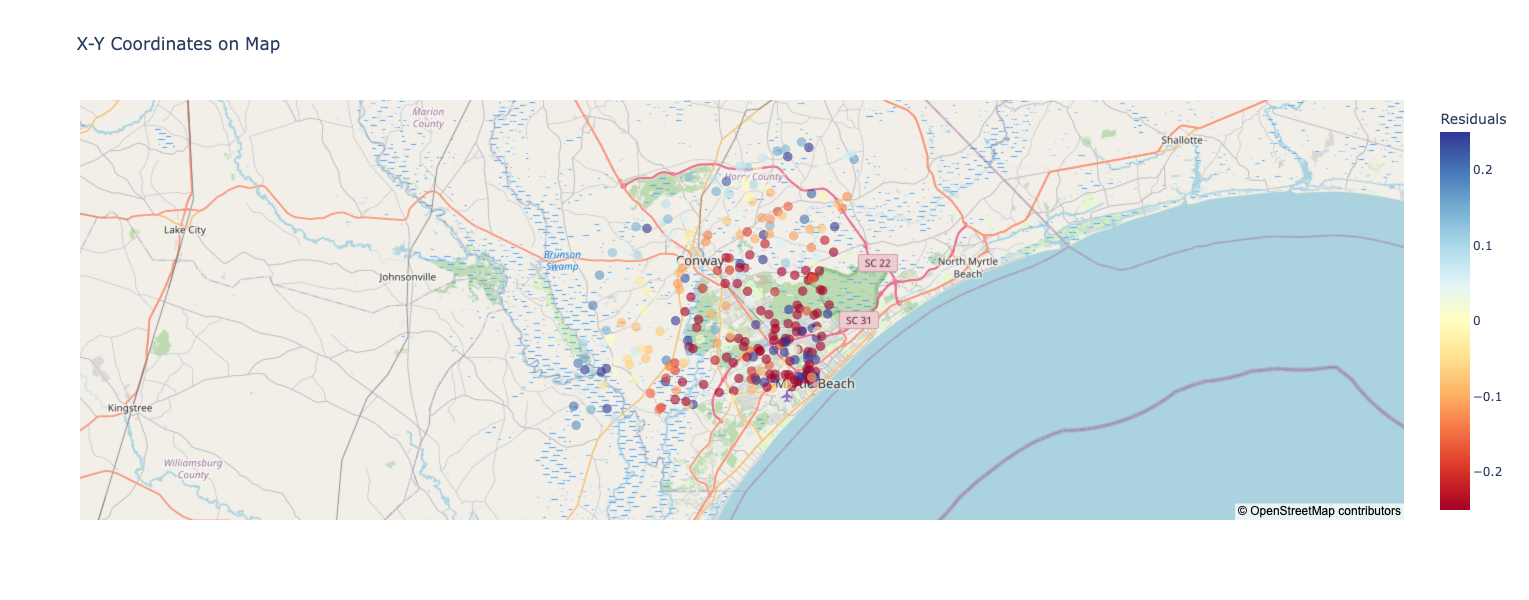

In [15]:
import plotly.graph_objects as go

# Example x-y coordinates
x_coordinates = xy[:,1]
y_coordinates = xy[:,0]
# Create a scattermapbox trace
trace = go.Scattermapbox(
    lat=y_coordinates,
    lon=x_coordinates,
    mode='markers',
    marker=dict(
        size=10,
        color=residuals_2_predictor.to_numpy(),
        colorscale='RdYlBu',  # Choose a colorscale (Red-Blue in this case)
        cmin=-0.25, #min(residuals.to_numpy()),
        cmax= 0.25, #max(residuals.to_numpy()),
        colorbar=dict(title='Residuals'),
        opacity=0.6
    ),
    #text=['Point 1', 'Point 2', 'Point 3', 'Point 4', 'Point 5']
)

# Define the layout for the map
layout = go.Layout(
    mapbox=dict(
        center=dict(lat=sum(y_coordinates)/len(y_coordinates), lon=sum(x_coordinates)/len(x_coordinates)),
        zoom=9,
        style='open-street-map'  # You can change the map style
    ),
    title='X-Y Coordinates on Map'
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(width=800, height=600)

# Show the plot
fig.show()

<div class="alert alert-block alert-info">

*Moment of relief*: I can improve my model and it's starting to make sense.

*Moment of understanding*: I can always model check.
</div>

---
---
## 5. You can continue model development and checking to better understand your data and improve your inference.

The process of model development can continue as long as you'd like.

As you develop new thoughts about your model, or new data, you can include them in the model.

With each modification, it's important to **model check**. We do so here by visualizing the residuals.

Our updated model removed a systematic trend in the residuals, but another trend remained:

- the variance in the residuals increased with the predictor (`swim_lessons`)

Let's look once more:

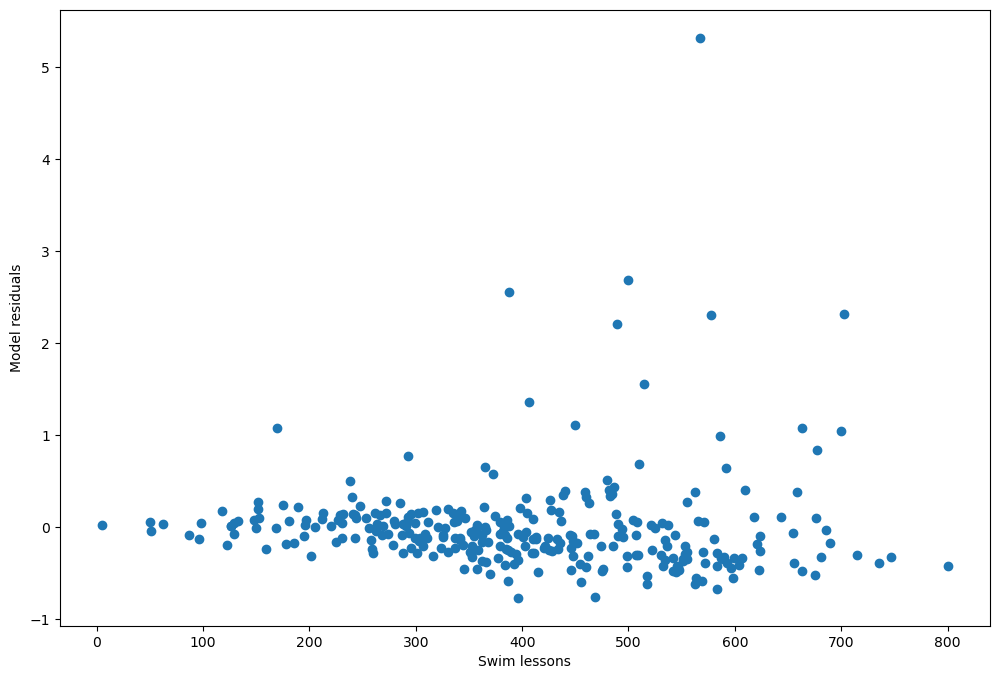

In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(swim_lessons, residuals_2_predictor)
plt.xlabel('Swim lessons')
plt.ylabel('Model residuals');

This type of trend (increased variance with increasing values) suggests another model modification:

replace `drownings` --> `log(drowning)`

A log-transformation of the outcome variable has some nice properties:

- it's variance normalizing
- it's appropriate for positive values concentrated near 0.

Let's look at the distribution of values in `drownings`:

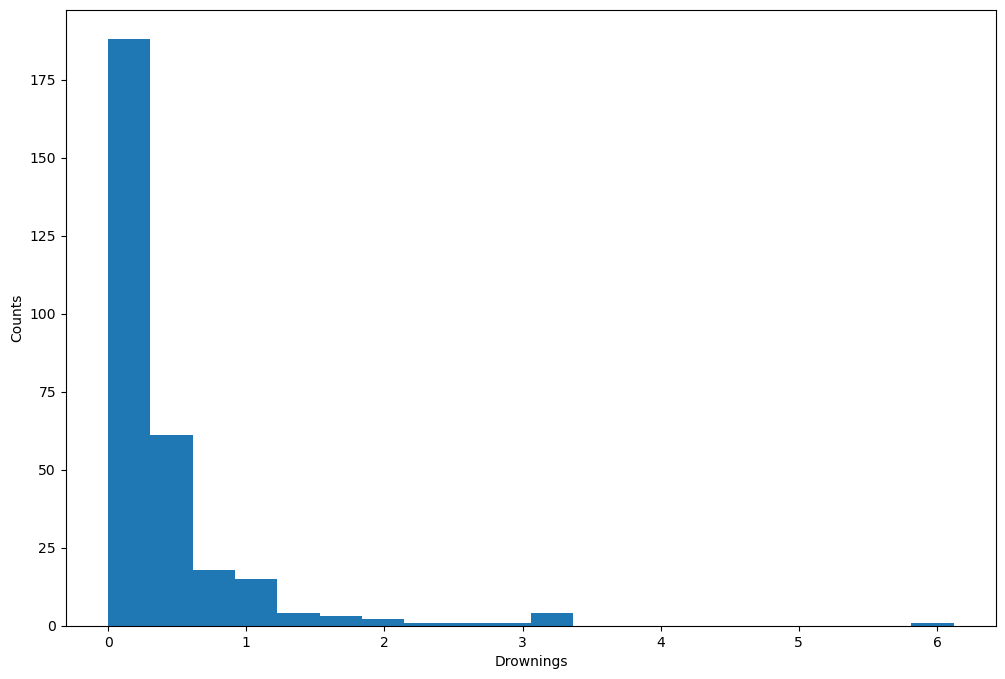

In [17]:
plt.figure(figsize=(12, 8))
plt.hist(drownings, 20);
plt.xlabel('Drownings')
plt.ylabel('Counts');

In this plot, you'll notice:
- Most observations of drownings are near 0.
- There are a few observations of many drownings (e.g., `drownings` > 2).

If instead we look at the distribution of `log(drownings)`

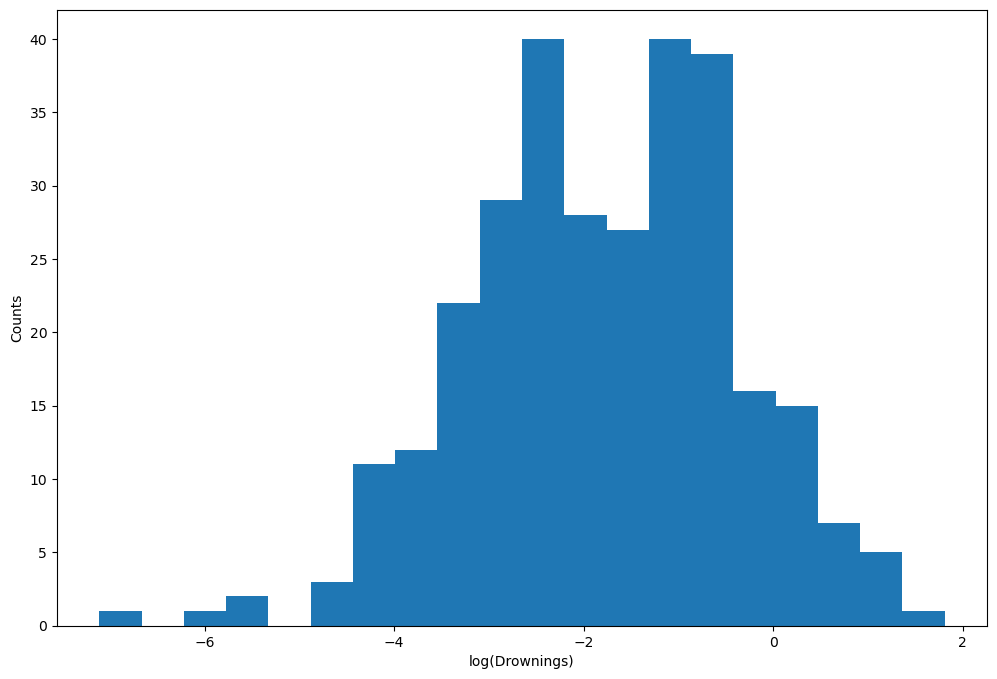

In [18]:
plt.figure(figsize=(12, 8))
plt.hist(np.log(drownings), 20);
plt.xlabel('log(Drownings)')
plt.ylabel('Counts');

The log transformation acts to compress large values (i.e., the value 6 becomes 1.79).

The resulting distribtion of the transformed observations `log(drownings)` is more symetric.

Let's fit the model to these transformed data:

In [19]:
from statsmodels.formula.api import ols

data                 = {"w": distance_from_ocean, "x": swim_lessons, "y": np.log(drownings)}
regression_results_3_predictor = ols("y ~1 + w + x", data=data).fit()

In [20]:
print('Distance from ocean')
print('Slope estimate =',regression_results_3_predictor.params[1])
print('p-value        =',regression_results_3_predictor.pvalues[1])

print('\nNumber of swim lessons')
print('Slope estimate =',regression_results_3_predictor.params[2])
print('p-value        =',regression_results_3_predictor.pvalues[2])

Distance from ocean
Slope estimate = -0.19938849531394798
p-value        = 1.8069951574102685e-30

Number of swim lessons
Slope estimate = -0.0013268619864811786
p-value        = 0.022196156328592523


<div class="alert alert-block alert-success">

**Q:** Interpert the results ... what does this mean?

**A:**

</div>

And, let's model check by plotting the `residuals` versus the predictor `swim_lessons`.

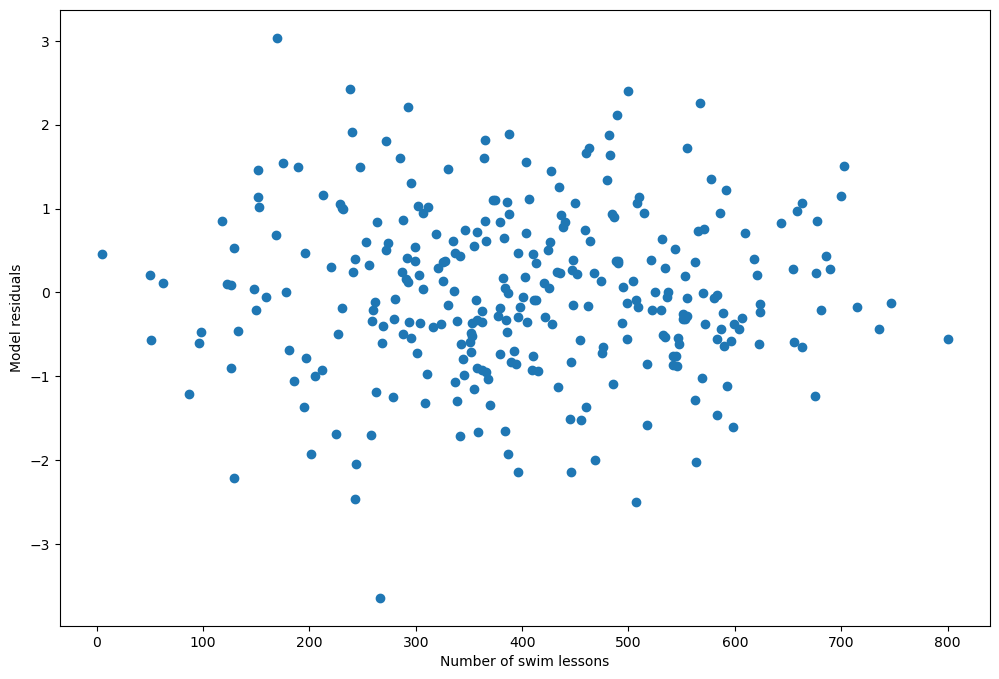

In [21]:
residuals = regression_results_3_predictor.resid
plt.figure(figsize=(12, 8))
plt.scatter(swim_lessons, residuals)
plt.xlabel('Number of swim lessons')
plt.ylabel('Model residuals');

<div class="alert alert-block alert-success">

**Q:** Do the residuals look less patterned (compared to our original line fit)? Do you still see any patterns?

**A:**
    
</div>

<div class="alert alert-block alert-info">

*Moment of understanding*: Inference and model checking is an iterative process.